### Configuration

In [1]:
args = {
  'top': 10,
  'country': 'united_states',
  'real_gdp_scale': 1000000
}

### Libraries

In [2]:
import pandas as pd

import constants as Constants
import utils.file as File
import utils.visualiser as Visualiser

import utils.firms as Firm
import utils.tags as Tag

def get_year_count(firms):
  return firms.groupby(['Founded Year']).size()

def get_scaled_year_count(firms, real_gdp):
  year_count = firms.groupby(['Founded Year']).size()
  scaled_year_count = year_count / real_gdp.loc[year_count.index] * args['real_gdp_scale']

  return scaled_year_count

def get_tag_group_year_count(firms, tag_group):
  tag_group_firms = firms[firms['Tag Groups'].apply(lambda firm_tag_group: tag_group in firm_tag_group)]

  return tag_group_firms.groupby(['Founded Year']).size()

def get_tag_year_count(firms, tag):
  tag_group_firms = firms[firms['Tags'].apply(lambda firm_tag: tag in firm_tag)]

  return tag_group_firms.groupby(['Founded Year']).size()


### Run

In [3]:
# Read Firm Data
firms = File.read_pickle(f"{args['country']}_firms")

In [4]:
# Read Domain Data
domain_created_year_map = File.read_pickle('domain_created_year_map')

In [5]:
# Filter Firms
firms = Firm.enrich_founded_year(firms, domain_created_year_map)
firms = Firm.enrich_science(firms, Constants.tag_group_science_map)
firms = firms[firms['Company Type'] == 'For Profit']
firms = firms[pd.notna(firms['Founded Year'])]
firms = firms[firms['Founded Year'] >= 1950]
firms = firms[firms['Founded Year'] <= 2019]
firms = firms.reset_index(drop=True)

['Artificial Intelligence (AI)', 'Biotechnology', 'Energy', 'Hardware', 'Science and Engineering', 'Sustainability']


In [6]:
# Read Macro Data
real_gdp = File.read_pickle('real_gdp')
fed_rate = File.read_pickle('fed_rate')

In [7]:
# Filter Macro Data
real_gdp = real_gdp['United States']
real_gdp = real_gdp[real_gdp.index >= 1950]
real_gdp = real_gdp[real_gdp.index <= 2019]

fed_rate = fed_rate[fed_rate.index >= 1950]
fed_rate = fed_rate[fed_rate.index <= 2019]
first_fed_rate = fed_rate.loc[fed_rate['Fed Rate'].first_valid_index(), 'Fed Rate']
fed_rate = fed_rate.reindex(range(1950, 2020)).fillna(value=first_fed_rate)

In [12]:
year_count = get_year_count(firms)
scaled_year_count = get_scaled_year_count(firms, real_gdp)

ai_year_count = get_tag_group_year_count(firms, 'Artificial Intelligence (AI)')
biotech_year_count = get_tag_group_year_count(firms, 'Biotechnology')
search_year_count = get_tag_year_count(firms, 'Search Engine')


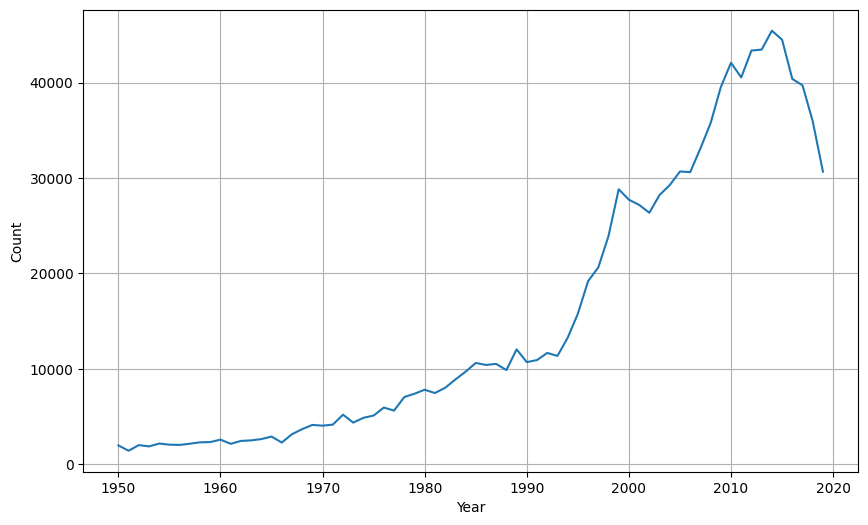

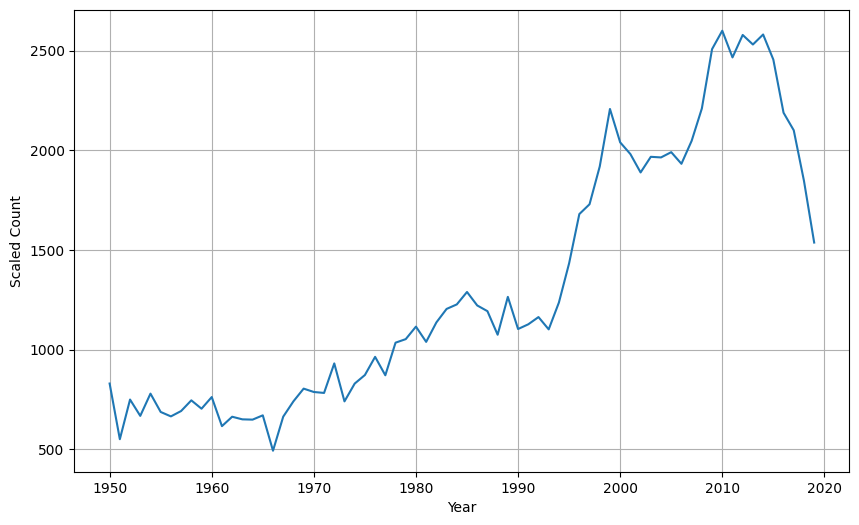

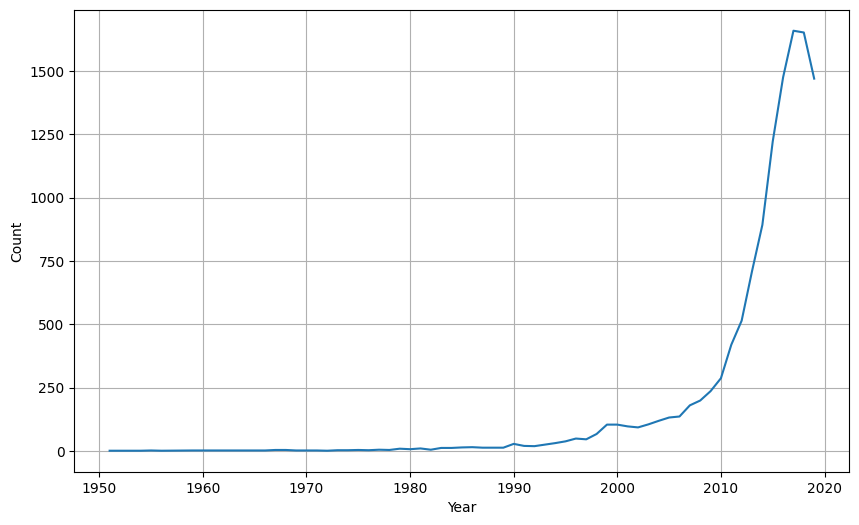

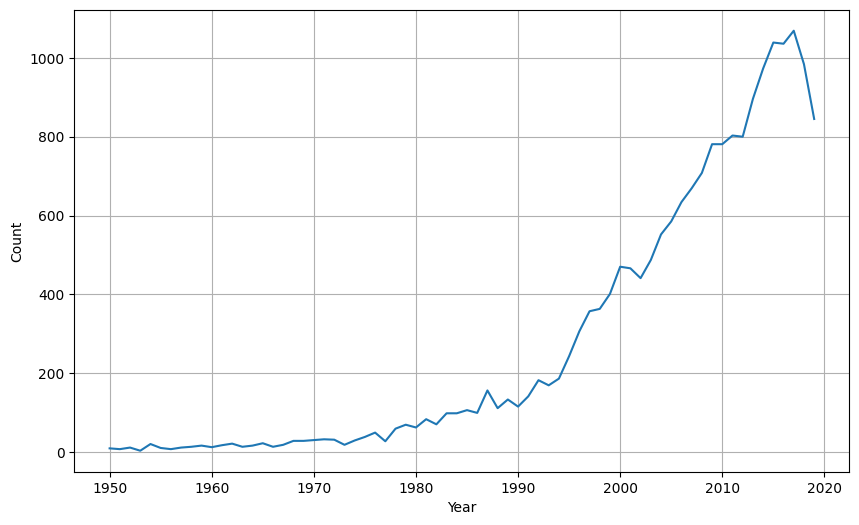

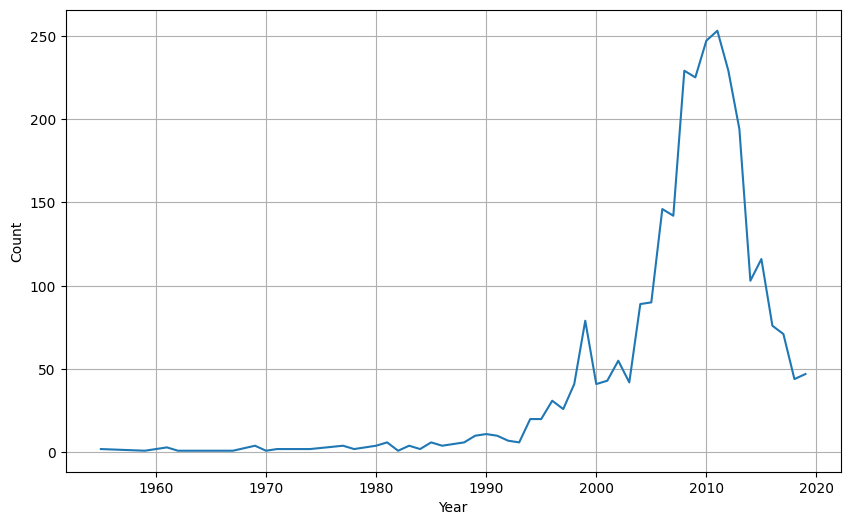

In [13]:
Visualiser.plot(year_count, 'Count')
Visualiser.show()

Visualiser.plot(scaled_year_count, 'Scaled Count')
Visualiser.show()

Visualiser.plot(ai_year_count, 'Count')
Visualiser.show()

Visualiser.plot(biotech_year_count, 'Count')
Visualiser.show()

Visualiser.plot(search_year_count, 'Count')
Visualiser.show()